# Evaluating Spin Correlations in thermal Hamiltonians

In [16]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [3]:
I = np.array([[1,0],[0,1]])
Z = np.array([[1,0],[0,-1]])
Y = np.array([[0,-1j],[1j,0]])
X = np.array([[0,1],[1,0]])

def transverse_ising(g,J):
    return J*np.kron(Z,Z) + g*(np.kron(X,I) + np.kron(I,X))

[Text(0, 0.5, '$\\langle \\sigma_z^1\\sigma_z^2\\rangle$'),
 Text(0.5, 0, '$\\beta$'),
 Text(0.5, 1.0, 'Spin Correlation in 2 site Transverse Ising model')]

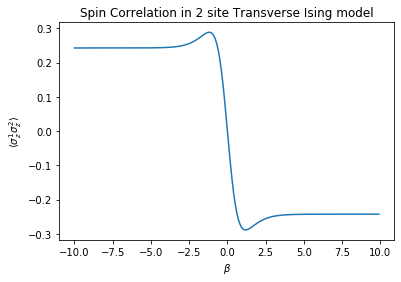

In [26]:
beta = np.arange(-10,10,.1)
H = transverse_ising(1,0.5)
Zcorr = np.kron(Z,Z)
Z1 = np.kron(I,Z)
Z2 = np.kron(Z,I)
data = np.empty((len(beta),2))
for it, bt in enumerate(beta):
    rho_th = la.expm(-bt*H)/np.trace(la.expm(-bt*H))
    correlation = np.trace(np.dot(Zcorr,rho_th))
    spn1_corr = np.trace(np.dot(Z1,rho_th))
    spn2_corr = np.trace(np.dot(Z2,rho_th))
    #print(correlation, spn1_corr)
    data[it][0]= bt
    data[it][1] = correlation
#print(data)
# This is only one piece of spin correlation. Look back to topological insulator work
# You can't have long range correlation in 1D but you can have local correlation
# With two spins this is local
#print(data)
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1])
ax.set(xlabel=r'$\beta$', ylabel=r'$\langle \sigma_z^1\sigma_z^2\rangle$',
       title='Spin Correlation in 2 site Transverse Ising model')
